# 🔹UFC Fight Predictor Feature Engineering


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.helpers import *
from src.io_model import *
from src.data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv')

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    logger.info("✅ Data ETL loaded successfully.")
except Exception as e:
    logger.error(f"❌ Error loading data: {e}")

[INFO] ✅ Data ETL loaded successfully.


# Initial Drop for Modeling

In [3]:
ufc_df = ufc_df.drop(['RedFighter','BlueFighter','RedExpectedValue', 'Finish',
                      'BlueExpectedValue','Date','Location','Country', 'BetterRank'],axis=1)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Initialize UFCData object

In [4]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6057
🧪 Train/Test split  : 4845 / 1212
🧪 Total features     : 60

🔢 Numerical features : 54
🔠 Categorical features: 6
    - Binary          : 3
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3515 (58.0%)
   - Class 1: 2542 (42.0%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std       min       max
RedOdds                     -117.473  281.360 -2100.000   775.000
BlueOdds                      61.305  255.318 -1200.000  1300.000
NumberOfRounds                 3.192    0.587     3.000     5.000
BlueCurrentLoseStreak          0.497    0.792     0.000     6.000
BlueCurrentWinStreak           0.984    1.421     0.000    12.000
BlueDraws                      0.022    0.150     0.000     2.000
BlueLongestWinStreak           1.944    1.916     0.000    17.000
BlueLosses                     1.878    2.180     0.000    1

# Feature Engineering

## Categorical Data

### Stance
- **Orthodox Stance:** A fighter in orthodox stance leads with their left foot and left hand, making it the natural stance for right-handed individuals. 
- **Southpaw Stance:** A fighter in southpaw stance leads with their right foot and right hand, making it the natural stance for left-handed individuals. 
- **Switch:** When a fighter switches from an orthodox to a southpaw stance or vice versa, it can disrupt their opponent's rhythm, causing them to miss or react incorrectly to strikes.

This features are codified in Fight Stance Column via Closed and Open Stances Matchups

##  Weight Class

In [5]:
ufc_df['WeightClass'].unique()

array(['Welterweight', 'Featherweight', 'Flyweight', 'Light Heavyweight',
       'Bantamweight', 'Lightweight', "Women's Flyweight",
       "Women's Strawweight", 'Heavyweight', 'Catch Weight',
       'Middleweight', "Women's Bantamweight", "Women's Featherweight"],
      dtype=object)

In [6]:
ufc_df[ufc_df['WeightClass'] == 'Catch Weight']

,RedOdds,BlueOdds,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueLongestWinStreak,...,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,FightStance,label
22,-112.0,-108.0,False,Catch Weight,MALE,3,0,1,0,2,...,0,-3,-2.54,-7.62,-3,0.2300,-0.7000,-1.6500,Open Stance,1
43,-1000.0,650.0,False,Catch Weight,MALE,3,2,0,0,1,...,-2,0,2.54,-5.08,-3,0.8700,0.0000,0.0000,Closed Stance,0
68,215.0,-265.0,False,Catch Weight,MALE,3,0,2,0,2,...,-1,-1,7.62,20.32,-5,-1.2800,-0.4000,1.5200,Open Stance,0
195,240.0,-298.0,False,Catch Weight,MALE,3,0,3,0,3,...,-2,-1,10.16,2.54,-3,0.5400,2.6000,-0.4900,Closed Stance,1
419,-115.0,-105.0,False,Catch Weight,MALE,3,0,2,0,3,...,-1,3,7.62,5.08,5,-1.5400,0.7000,0.1800,Open Stance,0
424,-160.0,195.0,False,Catch Weight,MALE,3,0,1,0,1,...,-1,1,5.08,2.54,6,1.6800,2.1000,1.5100,Closed Stance,0
476,300.0,-380.0,False,Catch Weight,MALE,3,0,0,0,0,...,0,0,0.00,-5.08,-13,2.6800,0.0000,0.0000,Closed Stance,1
512,-380.0,300.0,False,Catch Weight,MALE,5,0,1,0,4,...,1,0,-7.62,2.54,5,0.5100,0.0000,-0.3000,Open Stance,0
608,116.0,-136.0,False,Catch Weight,MALE,3,0,1,0,2,...,0,1,0.00,-5.08,0,-3.2900,1.0000,2.7500,Closed Stance,1
625,-156.0,130.0,False,Catch Weight,MALE,3,1,0,0,2,...,1,1,2.54,10.16,4,-0.8100,0.2000,-1.6700,Closed Stance,1


In [7]:
ufc_df = ufc_df[ufc_df['WeightClass'] != 'Catch Weight']

In [8]:
ufc_df['WeightClass'].unique()

array(['Welterweight', 'Featherweight', 'Flyweight', 'Light Heavyweight',
       'Bantamweight', 'Lightweight', "Women's Flyweight",
       "Women's Strawweight", 'Heavyweight', 'Middleweight',
       "Women's Bantamweight", "Women's Featherweight"], dtype=object)

In [9]:
# Diccionario de mapeo de WeightClass → WeightGroup
weight_class_map = {
    'Flyweight': 'Light',
    'Bantamweight': 'Light',
    'Featherweight': 'Light',
    'Lightweight': 'Light',
    'Welterweight': 'Medium',
    'Middleweight': 'Medium',
    'Light Heavyweight': 'Heavy',
    'Heavyweight': 'Heavy',
    "Women's Flyweight": 'Women',
    "Women's Strawweight": 'Women',
    "Women's Bantamweight": 'Women',
    "Women's Featherweight": 'Women',
}
# Crear nueva columna con el grupo
ufc_df['WeightGroup'] = ufc_df['WeightClass'].map(weight_class_map)

In [10]:
ufc_df['WeightGroup']

0       Medium
1        Light
2        Light
3        Heavy
4        Light
         ...  
6052     Light
6053    Medium
6054     Heavy
6055    Medium
6056     Heavy
Name: WeightGroup, Length: 6001, dtype: object

In [11]:
ufc_df['WeightClass']

0            Welterweight
1           Featherweight
2               Flyweight
3       Light Heavyweight
4            Bantamweight
              ...        
6052          Lightweight
6053         Welterweight
6054          Heavyweight
6055         Welterweight
6056    Light Heavyweight
Name: WeightClass, Length: 6001, dtype: object

In [12]:
ufc_df=ufc_df.drop(['WeightClass'], axis=1)

In [13]:
ufc_df['RedTotalFights'] = ufc_df['RedWins'] + ufc_df['RedLosses'] + ufc_df['RedDraws']
ufc_df['BlueTotalFights'] = ufc_df['BlueWins'] + ufc_df['BlueLosses'] + ufc_df['BlueDraws']

In [14]:
ufc_df

,RedOdds,BlueOdds,TitleBout,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueLongestWinStreak,BlueLosses,...,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,FightStance,label,WeightGroup,RedTotalFights,BlueTotalFights
0,205.0,-250.0,False,MALE,5,0,5,0,5,4,...,10.16,-6,0.2500,-0.2000,-1.8300,Open Stance,1,Medium,16,14
1,124.0,-148.0,False,MALE,3,1,0,0,4,4,...,0.00,-5,2.6900,0.7000,0.2000,Closed Stance,0,Light,32,11
2,-395.0,310.0,False,MALE,3,0,4,0,4,2,...,-7.62,3,-1.1200,-0.2000,1.7200,Open Stance,0,Light,7,6
3,-340.0,270.0,False,MALE,3,2,0,1,4,6,...,-2.54,9,2.6800,-0.8000,-3.6200,Closed Stance,1,Heavy,6,15
4,185.0,-225.0,False,MALE,3,0,4,0,4,0,...,-2.54,0,-0.5700,0.0000,0.2500,Closed Stance,1,Light,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,-155.0,135.0,False,MALE,3,0,0,0,0,0,...,2.54,6,-13.6667,0.0000,0.0000,Closed Stance,1,Light,3,0
6053,-210.0,175.0,False,MALE,3,0,0,0,0,0,...,7.62,-2,-18.0000,-1.0000,-4.6667,Open Stance,0,Medium,3,0
6054,-260.0,220.0,False,MALE,3,1,0,0,0,1,...,-2.12,0,-4.0000,1.0000,1.0000,Closed Stance,0,Heavy,1,1
6055,-420.0,335.0,False,MALE,3,0,0,0,0,0,...,7.62,-5,-40.5000,0.0000,-3.5000,Closed Stance,0,Medium,2,0


##  Feature Construction

### Physical characteristics

In [15]:
# HeighDif (Clean) 
ufc_df['HeightDif'] = ufc_df['BlueHeightCms'] - ufc_df['RedHeightCms']

# ReachDif (Clean)
ufc_df['ReachDif'] = ufc_df['BlueReachCms'] - ufc_df['RedReachCms']

# AgeDif (Clean)
ufc_df['AgeDif'] = ufc_df['BlueAge'] - ufc_df['RedAge']

# TotalTitleBoutDif (Clean)
ufc_df['TotalTitleBoutDif'] = ufc_df['BlueTotalTitleBouts'] - ufc_df['RedTotalTitleBouts']

In [16]:
ufc_df

,RedOdds,BlueOdds,TitleBout,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueLongestWinStreak,BlueLosses,...,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,FightStance,label,WeightGroup,RedTotalFights,BlueTotalFights
0,205.0,-250.0,False,MALE,5,0,5,0,5,4,...,10.16,-6.0,0.2500,-0.2000,-1.8300,Open Stance,1,Medium,16,14
1,124.0,-148.0,False,MALE,3,1,0,0,4,4,...,0.00,-5.0,2.6900,0.7000,0.2000,Closed Stance,0,Light,32,11
2,-395.0,310.0,False,MALE,3,0,4,0,4,2,...,-7.62,3.0,-1.1200,-0.2000,1.7200,Open Stance,0,Light,7,6
3,-340.0,270.0,False,MALE,3,2,0,1,4,6,...,-2.54,9.0,2.6800,-0.8000,-3.6200,Closed Stance,1,Heavy,6,15
4,185.0,-225.0,False,MALE,3,0,4,0,4,0,...,-2.54,0.0,-0.5700,0.0000,0.2500,Closed Stance,1,Light,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,-155.0,135.0,False,MALE,3,0,0,0,0,0,...,2.54,-6.0,-13.6667,0.0000,0.0000,Closed Stance,1,Light,3,0
6053,-210.0,175.0,False,MALE,3,0,0,0,0,0,...,7.62,2.0,-18.0000,-1.0000,-4.6667,Open Stance,0,Medium,3,0
6054,-260.0,220.0,False,MALE,3,1,0,0,0,1,...,-2.12,0.0,-4.0000,1.0000,1.0000,Closed Stance,0,Heavy,1,1
6055,-420.0,335.0,False,MALE,3,0,0,0,0,0,...,7.62,5.0,-40.5000,0.0000,-3.5000,Closed Stance,0,Medium,2,0


In [17]:
# Height/Reach Ratio
RedHeightReachRatio = ufc_df['RedHeightCms'] / ufc_df['RedReachCms']
BlueHeightReachRatio = ufc_df['BlueHeightCms'] / ufc_df['BlueReachCms']
ufc_df['HeightReachRatioDif']= BlueHeightReachRatio - RedHeightReachRatio

### Fighting Style Features

In [18]:
# ================================
#     Fighting Style Features
# ================================

# Finish Rate (Red & Blue)
# → Proportion of wins that were finishes (KO, submission, TKO).
# → Higher = fighter tends to end fights rather than go to decision.
ufc_df['RedFinishRate'] = (ufc_df['RedWinsByKO'] + ufc_df['RedWinsBySubmission'] + ufc_df['RedWinsByTKODoctorStoppage']) / ufc_df['RedWins'].replace(0, 1)
ufc_df['BlueFinishRate'] = (ufc_df['BlueWinsByKO'] + ufc_df['BlueWinsBySubmission'] + ufc_df['BlueWinsByTKODoctorStoppage']) / ufc_df['BlueWins'].replace(0, 1)

# Win Ratio (Red & Blue)
# → Overall success rate (wins / total fights).
# → Measures how effective the fighter has been historically.
ufc_df['RedWinRatio'] = ufc_df['RedWins'] / ufc_df['RedTotalFights'].replace(0, 1)
ufc_df['BlueWinRatio'] = ufc_df['BlueWins'] / ufc_df['BlueTotalFights'].replace(0, 1)

# KO Per Fight
# → Ratio of KO wins per total fights.
# → Strong indicator of striking power and finishing ability.
ufc_df['RedKOPerFight'] = (ufc_df['RedWinsByKO'] + ufc_df['RedWinsByTKODoctorStoppage']) / ufc_df['RedTotalFights'].replace(0, 1)
ufc_df['BlueKOPerFight'] = (ufc_df['BlueWinsByKO'] + ufc_df['BlueWinsByTKODoctorStoppage']) / ufc_df['BlueTotalFights'].replace(0, 1)

# Submission Per Fight
# → Ratio of submission wins per total fights.
# → Proxy for grappling skill and submission danger.
ufc_df['RedSubPerFight'] = ufc_df['RedWinsBySubmission'] / ufc_df['RedTotalFights'].replace(0, 1)
ufc_df['BlueSubPerFight'] = ufc_df['BlueWinsBySubmission'] / ufc_df['BlueTotalFights'].replace(0, 1)

### External Variables

In [19]:
# IsFiveRoundFight
ufc_df['IsFiveRoundFight'] = ufc_df['NumberOfRounds'] == 5

In [20]:
# Odds Dif
ufc_df['OddsDif'] = ufc_df['BlueOdds'] - ufc_df['RedOdds']

# Update UFCData object

In [21]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 73

🔢 Numerical features : 66
🔠 Categorical features: 7
    - Binary          : 4
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                                mean      std      min       max
RedOdds                     -117.620  276.878 -2100.00   775.000
BlueOdds                      62.135  252.956 -1200.00  1300.000
NumberOfRounds                 3.195    0.591     3.00     5.000
BlueCurrentLoseStreak          0.505    0.794     0.00     5.000
BlueCurrentWinStreak           0.970    1.430     0.00    12.000
BlueDraws                      0.021    0.150     0.00     2.000
BlueLongestWinStreak           1.954    1.961     0.00    17.000
BlueLosses                     1.882    2.172     0.00    16.000
Blu

# Feature Selection

Given the following:
-  LoseStreakDif: BlueCurrentLoseStreak - RedCurrentLoseStreak
-  WinStreakDif: BlueCurrentWinStreak - RedCurrentWinStreak
-  LongestWinStreakDif: BlueLongestWinStreak - 'RedLongestWinStreak
-  WinDif: BlueWins - RedWins
-  LossDif: BlueLosses - RedLosses
-  WinRatioDif = BlueWinRatio - RedWinRatio 
-  TotalTitleBoutDif: BlueTotalTitleBouts - RedTotalTitleBouts
-  KODif: BlueWinsByKO - RedWinsByKO
-  SubDif: BlueWinsBySubmission - RedWinsBySubmission
-  HeightDif: BlueHeightCms - RedHeightCms
-  ReachDif: BlueReachCms - RedReachCms
-  AgeDif: BlueAge - RedAge
-  Odds Dif: BlueOdds - RedOdds
-  FightStance: Defined using BlueStance and RedStance
  
We drop redundant columns.

In [22]:
ufc_df=ufc_df.drop(['BlueCurrentLoseStreak', 'RedCurrentLoseStreak','BlueCurrentWinStreak', 'WinDif', 'LossDif',
                      'RedCurrentWinStreak','BlueLongestWinStreak', 'RedLongestWinStreak', 'BlueWins',
                      'RedWins','BlueLosses','RedLosses', 'TotalTitleBoutDif', 'BlueTotalRoundsFought',
                      'BlueWinsByKO', 'RedWinsByKO', 'BlueWinsBySubmission', 'RedTotalRoundsFought',
                      'RedWinsBySubmission','BlueHeightCms','RedHeightCms','BlueReachCms','RedReachCms',
                      'BlueAge', 'RedAge', 'BlueStance', 'RedStance', 'TotalRoundDif', 'BlueOdds', 'RedOdds'], axis=1)

- DecisionRateDif
- FinishRateDif


In [23]:
ufc_df=ufc_df.drop(['BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
       'BlueWinsByTKODoctorStoppage', 'RedWinsByDecisionMajority',
       'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
       'RedWinsByTKODoctorStoppage','BlueWinsByDecisionMajority'], axis=1)

## Low Variance columns
- BlueDraws
- RedDraws
- BlueWeightLbs
- RedWeightLbs

In [24]:
ufc_df = ufc_df.drop(['BlueDraws','RedDraws','BlueWeightLbs','RedWeightLbs'], axis=1)

# After training, not good features.

In [25]:
# ufc_df = ufc_df.drop(['BlueDaysSinceDebut', 'RedDaysSinceDebut', 'BlueFightsInLastYear','RedFightsInLastYear', 'BlueFightsInLast6Months',
#                       'RedFightsInLast6Months', 'BlueDaysSinceLastFight', 'RedDaysSinceLastFight', 'BlueDaysSinceLastWin', 'RedDaysSinceLastWin',
#                      'RedIsDebut', 'BlueIsDebut'], axis=1) 

# Update UFCData object

In [26]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 31

🔢 Numerical features : 26
🔠 Categorical features: 5
    - Binary          : 4
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std      min       max
NumberOfRounds         3.195    0.591     3.00     5.000
BlueTotalTitleBouts    0.260    1.111     0.00    16.000
RedTotalTitleBouts     0.572    1.574     0.00    16.000
LoseStreakDif          0.059    1.012    -6.00     6.000
WinStreakDif          -0.162    1.921   -18.00    10.000
LongestWinStreakDif   -0.772    2.053   -12.00    14.000
KODif                 -0.536    2.181   -21.00    14.000
SubDif                -0.334    1.877   -15.00    10.000
HeightDif             -0.030    6.286   -33.02    30.480
ReachDif          

# Check Correlation Matrix

In [27]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
300,BlueFinishRate,BlueKOPerFight,0.672262
195,ReachDif,HeightReachRatioDif,0.642091
292,RedFinishRate,RedKOPerFight,0.638135
172,HeightDif,ReachDif,0.623959
298,BlueFinishRate,BlueWinRatio,0.520840
302,BlueFinishRate,BlueSubPerFight,0.511414
311,BlueWinRatio,BlueKOPerFight,0.501875


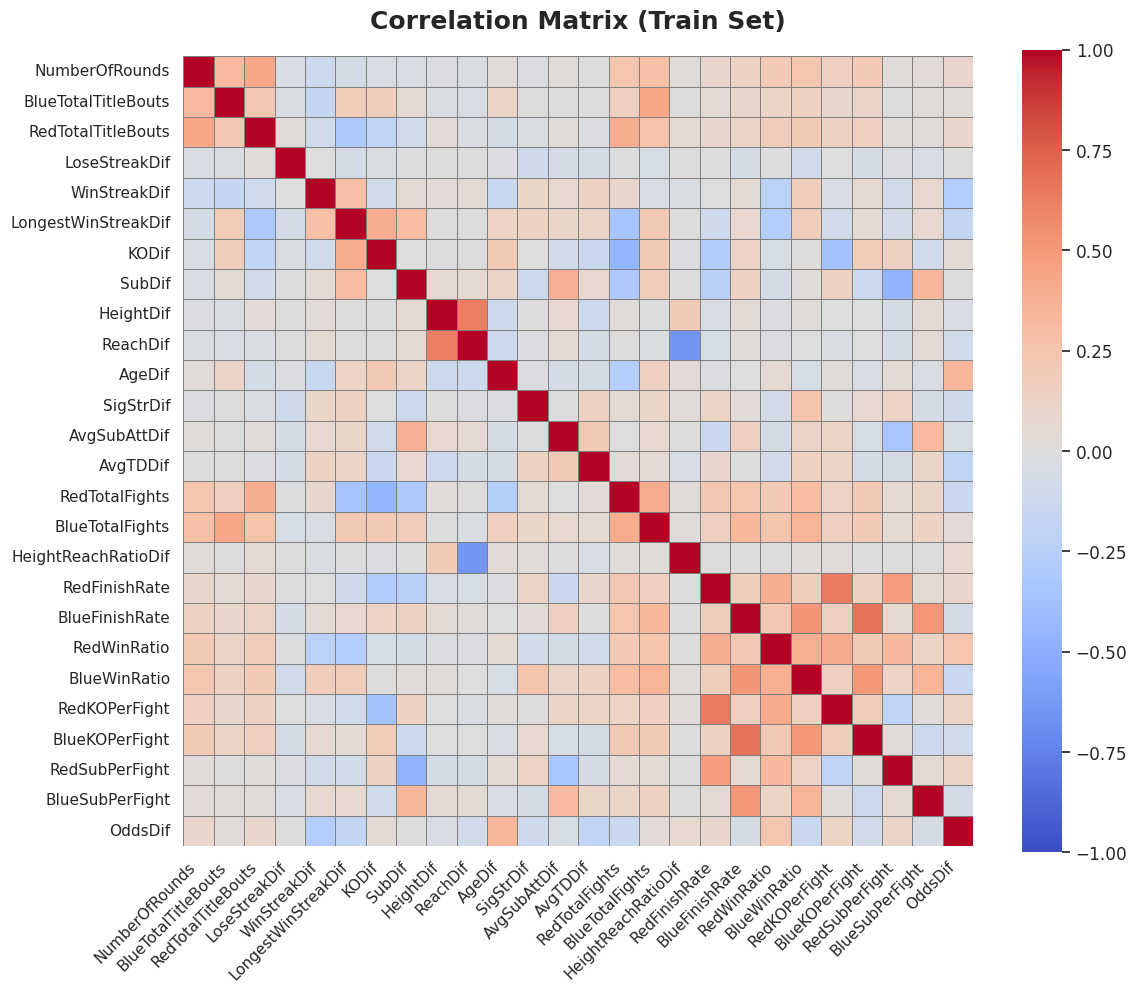

In [28]:
ufc_data.plot_corr(processed = status)

## Redundant Column
- NumberOfRounds equivalent to isFiveRound

In [29]:
ufc_df = ufc_df.drop(['NumberOfRounds'], axis=1)

In [30]:
# Preview the first few records
display(ufc_df.head())
display(ufc_df.columns)

,TitleBout,Gender,BlueTotalTitleBouts,RedTotalTitleBouts,LoseStreakDif,WinStreakDif,LongestWinStreakDif,KODif,SubDif,HeightDif,...,RedFinishRate,BlueFinishRate,RedWinRatio,BlueWinRatio,RedKOPerFight,BlueKOPerFight,RedSubPerFight,BlueSubPerFight,IsFiveRoundFight,OddsDif
0,False,MALE,0,4,-1,5,-2,4,-2,-2.54,...,0.416667,0.700000,0.750000,0.714286,0.187500,0.500000,0.125000,0.000000,True,-455.0
1,False,MALE,0,0,0,0,-2,-2,-1,5.08,...,0.421053,0.714286,0.593750,0.636364,0.187500,0.363636,0.062500,0.090909,False,-272.0
2,False,MALE,0,0,-1,4,0,1,1,-2.54,...,0.500000,1.000000,0.571429,0.666667,0.285714,0.500000,0.000000,0.166667,False,705.0
3,False,MALE,0,0,1,0,-1,2,-1,2.54,...,0.600000,0.500000,0.833333,0.533333,0.333333,0.266667,0.166667,0.000000,False,610.0
4,False,MALE,0,0,0,3,-2,-5,0,0.00,...,0.857143,0.250000,0.777778,1.000000,0.666667,0.250000,0.000000,0.000000,False,-410.0


Index(['TitleBout', 'Gender', 'BlueTotalTitleBouts', 'RedTotalTitleBouts',
       'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'KODif',
       'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif',
       'AvgSubAttDif', 'AvgTDDif', 'FightStance', 'label', 'WeightGroup',
       'RedTotalFights', 'BlueTotalFights', 'HeightReachRatioDif',
       'RedFinishRate', 'BlueFinishRate', 'RedWinRatio', 'BlueWinRatio',
       'RedKOPerFight', 'BlueKOPerFight', 'RedSubPerFight', 'BlueSubPerFight',
       'IsFiveRoundFight', 'OddsDif'],
      dtype='object')

# Update UFCData Object

**After training, checking the importances feature plot, we decide to drop some columns that performs several worse than a Random Noise.**
- LongestWinStreakDif
- TitleBout
- Gender

In [31]:
ufc_df = ufc_df.drop(['TitleBout', 'Gender'], axis=1)

In [32]:
ufc_df_no_odds = ufc_df.copy()
ufc_df_no_odds = ufc_df_no_odds.drop(['OddsDif'], axis=1)

In [33]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 28

🔢 Numerical features : 25
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std      min       max
BlueTotalTitleBouts    0.260    1.111     0.00    16.000
RedTotalTitleBouts     0.572    1.574     0.00    16.000
LoseStreakDif          0.059    1.012    -6.00     6.000
WinStreakDif          -0.162    1.921   -18.00    10.000
LongestWinStreakDif   -0.772    2.053   -12.00    14.000
KODif                 -0.536    2.181   -21.00    14.000
SubDif                -0.334    1.877   -15.00    10.000
HeightDif             -0.030    6.286   -33.02    30.480
ReachDif              -0.260    8.266   -33.02    30.480
AgeDif            

In [34]:
ufc_data_no_odds = UFCData(ufc_df_no_odds)
ufc_data_no_odds

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 27

🔢 Numerical features : 24
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                      mean     std     min      max
BlueTotalTitleBouts  0.260   1.111    0.00   16.000
RedTotalTitleBouts   0.572   1.574    0.00   16.000
LoseStreakDif        0.059   1.012   -6.00    6.000
WinStreakDif        -0.162   1.921  -18.00   10.000
LongestWinStreakDif -0.772   2.053  -12.00   14.000
KODif               -0.536   2.181  -21.00   14.000
SubDif              -0.334   1.877  -15.00   10.000
HeightDif           -0.030   6.286  -33.02   30.480
ReachDif            -0.260   8.266  -33.02   30.480
AgeDif              -0.611   5.181  -17.00   16.000
SigStrDif       

# Noise-based feature selection

In [35]:
# apply = False
# ufc_data.add_random_feature(apply=apply)
# ufc_data

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## Check Correlation Matrix

In [36]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
275,BlueFinishRate,BlueKOPerFight,0.672262
170,ReachDif,HeightReachRatioDif,0.642091
267,RedFinishRate,RedKOPerFight,0.638135
147,HeightDif,ReachDif,0.623959
273,BlueFinishRate,BlueWinRatio,0.520840
277,BlueFinishRate,BlueSubPerFight,0.511414
286,BlueWinRatio,BlueKOPerFight,0.501875


In [37]:
status = False
ufc_data_no_odds.compute_corr(processed = status)
ufc_data_no_odds.top_corr(processed = status)

,Feature 1,Feature 2,Correlation
258,BlueFinishRate,BlueKOPerFight,0.672262
162,ReachDif,HeightReachRatioDif,0.642091
251,RedFinishRate,RedKOPerFight,0.638135
140,HeightDif,ReachDif,0.623959
256,BlueFinishRate,BlueWinRatio,0.520840
260,BlueFinishRate,BlueSubPerFight,0.511414
267,BlueWinRatio,BlueKOPerFight,0.501875


# Inicialize Modeling Data: Standarize Numerical Data & Encode Categorical Data

In [38]:
ufc_data.standardize()
ufc_data.encode()

In [39]:
ufc_data_no_odds.standardize()
ufc_data_no_odds.encode()

# Check Modeling Correlation Matrix

In [40]:
status = True
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status, threshold = 0.4)

,Feature 1,Feature 2,Correlation
440,BlueFinishRate,BlueKOPerFight,0.672262
335,ReachDif,HeightReachRatioDif,0.642091
432,RedFinishRate,RedKOPerFight,0.638135
312,HeightDif,ReachDif,0.623959
87,WeightGroup_Light,WeightGroup_Medium,0.568048
438,BlueFinishRate,BlueWinRatio,0.520840
442,BlueFinishRate,BlueSubPerFight,0.511414
451,BlueWinRatio,BlueKOPerFight,0.501875
434,RedFinishRate,RedSubPerFight,0.482979
309,SubDif,RedSubPerFight,0.470917


In [41]:
status = True
ufc_data_no_odds.compute_corr(processed = status)
ufc_data_no_odds.top_corr(processed = status, threshold = 0.4)

,Feature 1,Feature 2,Correlation
417,BlueFinishRate,BlueKOPerFight,0.672262
321,ReachDif,HeightReachRatioDif,0.642091
410,RedFinishRate,RedKOPerFight,0.638135
299,HeightDif,ReachDif,0.623959
84,WeightGroup_Light,WeightGroup_Medium,0.568048
415,BlueFinishRate,BlueWinRatio,0.520840
419,BlueFinishRate,BlueSubPerFight,0.511414
426,BlueWinRatio,BlueKOPerFight,0.501875
412,RedFinishRate,RedSubPerFight,0.482979
297,SubDif,RedSubPerFight,0.470917


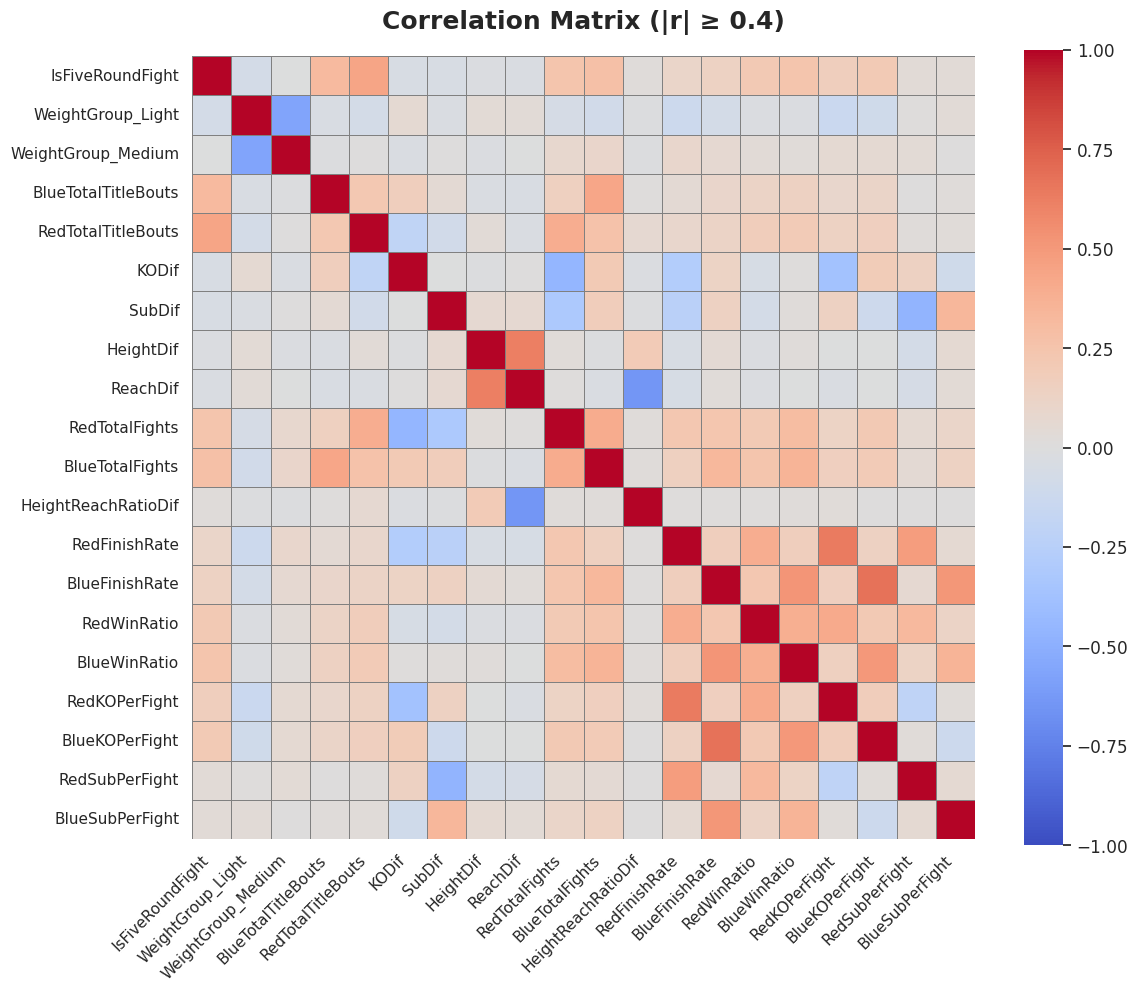

In [42]:
ufc_data.plot_corr(processed = status, threshold = 0.4)

# Check Modeling Data

In [43]:
ufc_data._X_train_processed

,IsFiveRoundFight,FightStance_Open Stance,WeightGroup_Heavy,WeightGroup_Light,WeightGroup_Medium,WeightGroup_Women,BlueTotalTitleBouts,RedTotalTitleBouts,LoseStreakDif,WinStreakDif,...,HeightReachRatioDif,RedFinishRate,BlueFinishRate,RedWinRatio,BlueWinRatio,RedKOPerFight,BlueKOPerFight,RedSubPerFight,BlueSubPerFight,OddsDif
1535,0,0,0,1,0,0,-0.233909,-0.363740,-0.058245,0.605158,...,-0.006285,-1.303524,-0.493029,1.408499,0.97921,-0.849817,0.004680,-0.626529,-0.507839,0.472861
1760,0,0,0,1,0,0,-0.233909,-0.363740,0.929654,-0.956819,...,-0.045157,-1.303524,-1.016024,0.147475,-0.13659,-0.849817,-0.705824,-0.626529,-0.507839,-0.883369
394,0,0,0,0,1,0,-0.233909,-0.363740,-0.058245,-1.477478,...,1.709294,0.095320,0.509378,1.408499,0.50101,1.329851,-0.232155,-0.626529,0.976583,0.838586
4715,1,0,0,0,1,0,-0.233909,0.271614,-0.058245,0.605158,...,-0.428359,0.295155,0.291463,0.512508,1.45741,0.985693,1.425687,-0.626529,-0.507839,0.390954
3123,0,1,0,1,0,0,-0.233909,-0.363740,-1.046144,0.084499,...,-0.840912,-1.303524,-1.016024,-1.996265,-1.41179,-0.849817,-0.705824,-0.626529,-0.507839,0.457623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,0,0,1,0,0,-0.233909,-0.363740,0.929654,-0.436160,...,-2.143205,-1.303524,-1.016024,1.408499,-1.41179,-0.849817,-0.705824,-0.626529,-0.507839,0.486195
3228,0,0,1,0,0,0,-0.233909,-0.363740,0.929654,1.125817,...,-0.304888,0.934626,1.598950,0.131712,1.45741,0.784934,1.425687,0.024769,2.164120,-0.837654
3238,0,0,0,0,0,1,-0.233909,-0.363740,0.929654,0.084499,...,-0.870724,0.561601,-1.016024,-0.293883,-1.41179,-0.123261,-0.705824,0.241868,-0.507839,0.762394
1734,0,0,0,1,0,0,-0.233909,-0.363740,-0.058245,0.084499,...,-0.033369,-1.303524,-1.016024,-1.996265,-1.41179,-0.849817,-0.705824,-0.626529,-0.507839,1.381460


[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

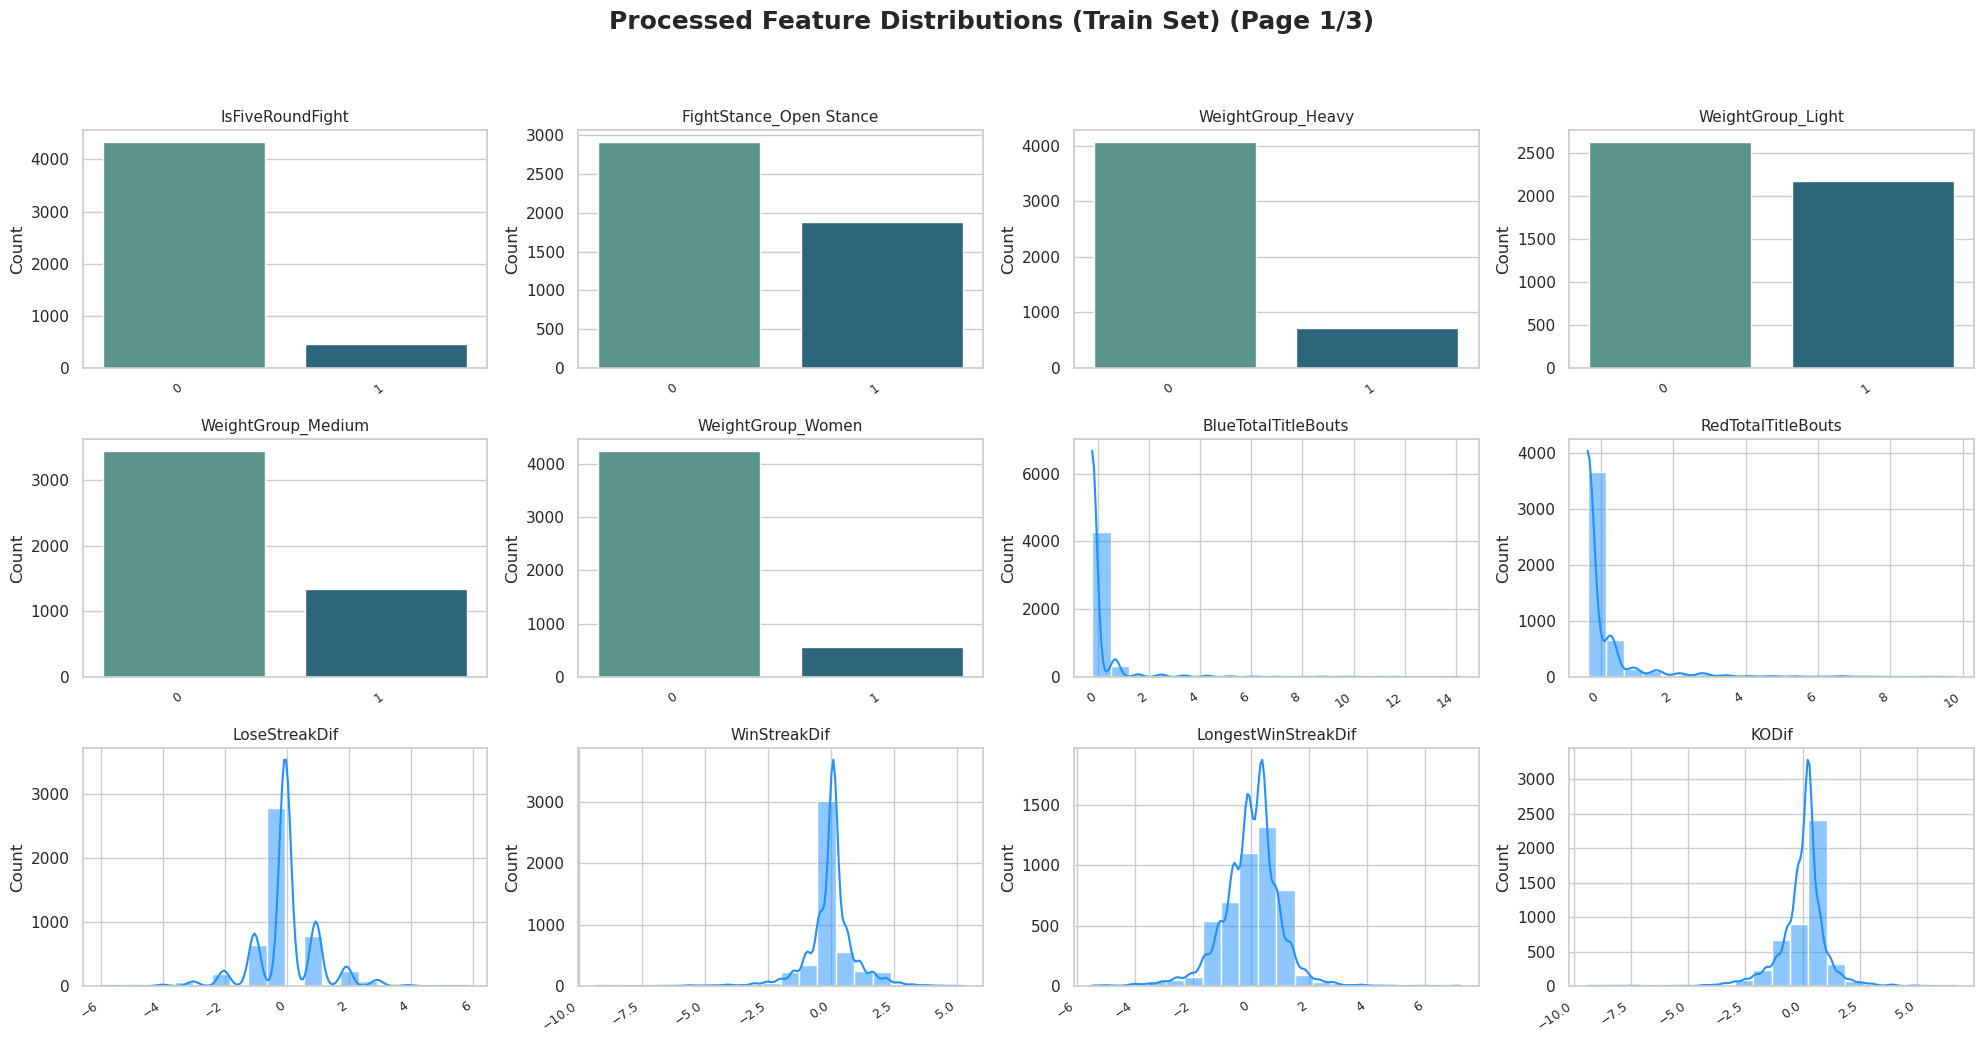

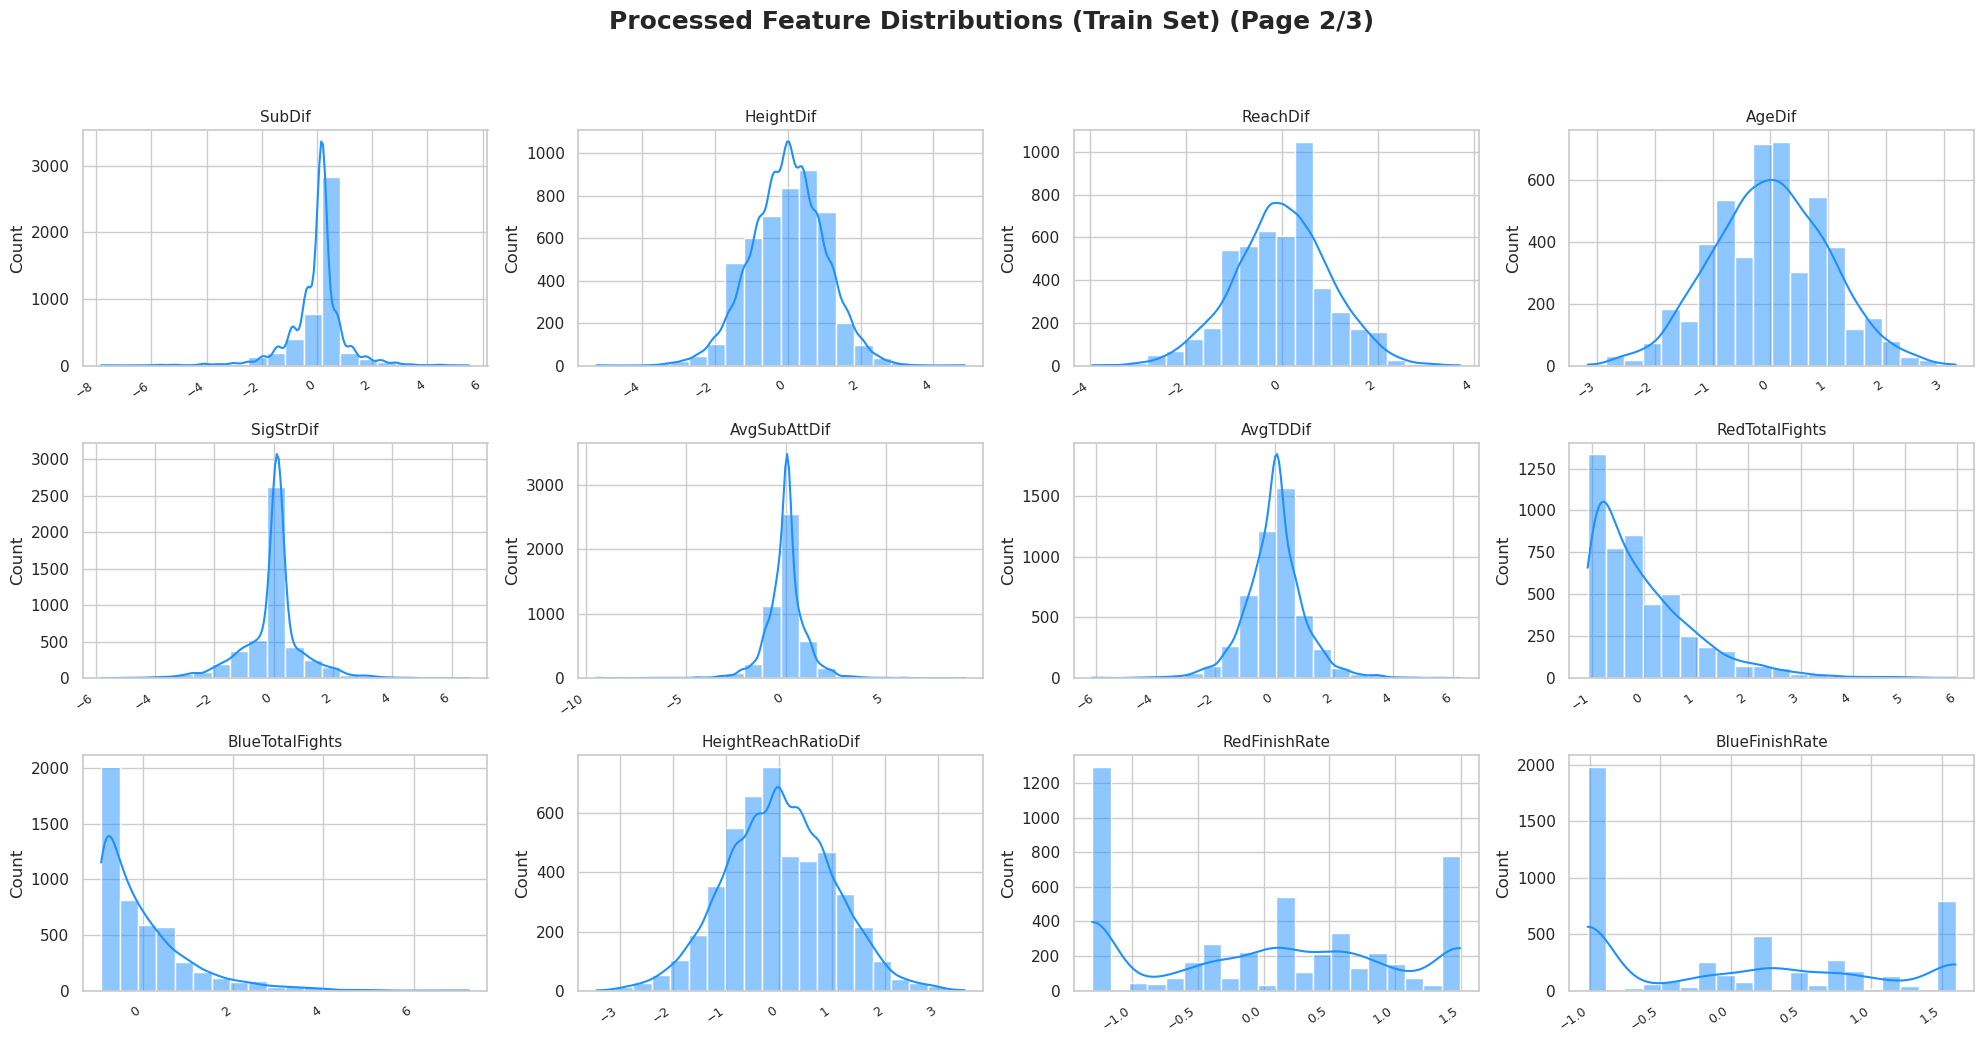

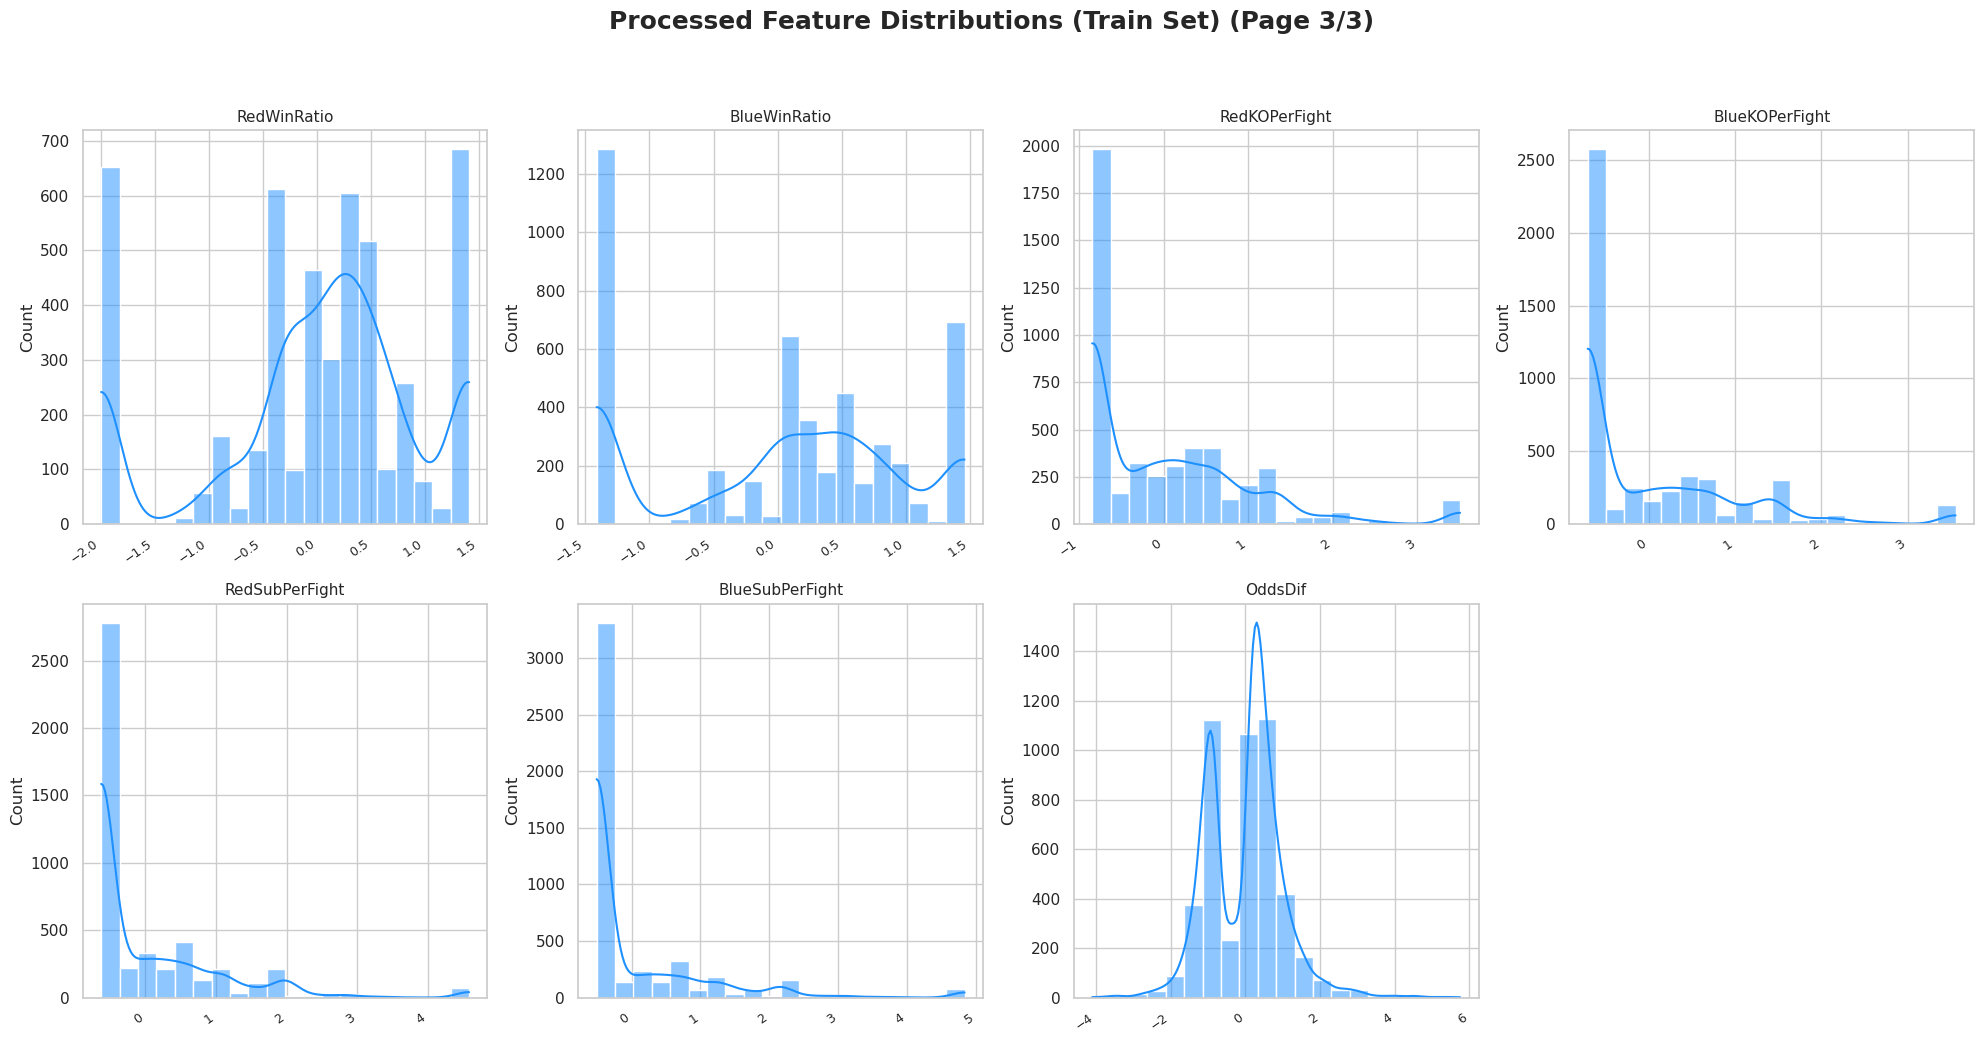

In [44]:
ufc_data.plot_feature_distributions(processed = True)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Save

In [45]:
ufc_modeling_data = ufc_data
ufc_modeling_data_no_odds = ufc_data_no_odds

In [46]:
save_data(ufc_modeling_data)

[INFO] ✅ UFCData object saved to: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl


In [47]:
save_data(ufc_modeling_data_no_odds, name = 'ufc_data_no_odds')

[INFO] ✅ UFCData object saved to: /home/mlioi/ufc-predictor/data/processed/ufc_data_no_odds.pkl


In [48]:
save_ufc_datasets(ufc_modeling_data, project_root)

[INFO] ✅ UFCData CSV files saved: ['ufc_train.csv', 'ufc_test.csv', 'ufc_processed_train.csv', 'ufc_processed_test.csv']


In [49]:
save_ufc_datasets(ufc_modeling_data, project_root, name='no_odds')

[INFO] ✅ UFCData CSV files saved: ['ufc_train_no_odds.csv', 'ufc_test_no_odds.csv', 'ufc_processed_train_no_odds.csv', 'ufc_processed_test_no_odds.csv']


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>